<a href="https://colab.research.google.com/github/arturodeleon19/Data-Science-Projects-NLP-Tensorflow/blob/main/Click%20Bait%20Title%20Classification/Click_Bait_Title_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("aryansinha2003/click-bait-title-classification")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/click-bait-title-classification


In [ ]:
import pandas as pd
import random
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import TextVectorization
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/kaggle/input/click-bait-title-classification/clickbait_title_classification.csv')
df.head()

,title,clickbait
0,""".asia"" domain applications near 300,000 on op...",0
1,"""1 Indian + 1 Indian = Unrelatable"": Televisio...",1
2,"""7th Heaven"" television series comes to an end",0
3,"""Arm Glow"" Is Your New Life Goal, Thanks To Lu...",1
4,"""Beans Memes"" Is The Only Twitter Account That...",1


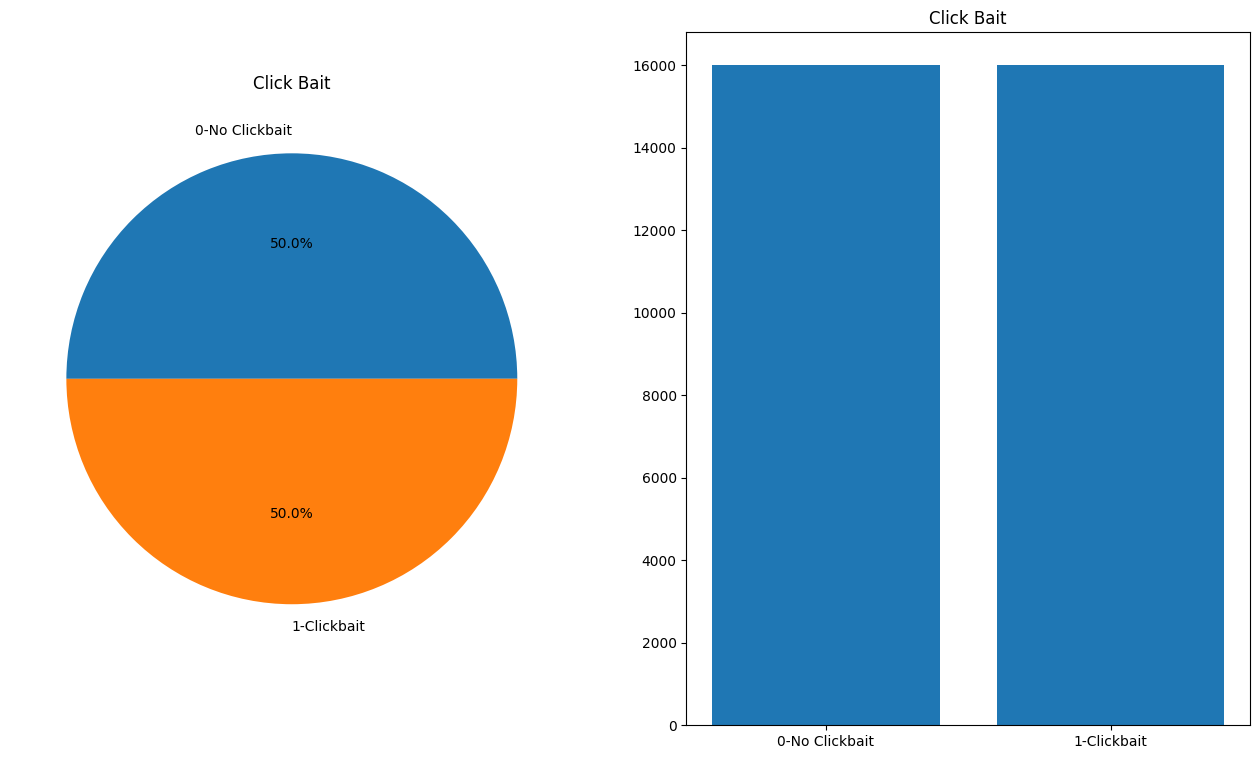

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 9))

# Plots
bait = df['clickbait'].value_counts()
axs[0].pie(bait, labels=['0-No Clickbait','1-Clickbait'], autopct='%1.1f%%')
axs[0].set_title('Click Bait')

axs[1].bar(['0-No Clickbait','1-Clickbait'], df['clickbait'].value_counts())
axs[1].set_title('Click Bait')

plt.show()

In [ ]:
# Get 10 random samples
random_samples = df.sample(n=10)

# Print each sample with data and labels
for index, row in random_samples.iterrows():
    print(f"Title: {row['title']}")
    print(f"Click Bait: {row['clickbait']}")
    print("-" * 50)

Title: US Treasury Department unveils new ten-dollar bill
Click Bait: 0
--------------------------------------------------
Title: 16 Tweets, Memes, And Reactions That Capture Modi's Surprise Visit To Pakistan
Click Bait: 1
--------------------------------------------------
Title: Urban Battle Looms Ahead for Pakistan in Swat
Click Bait: 0
--------------------------------------------------
Title: 12 Everyday Activities That Might Actually Be Good For You
Click Bait: 1
--------------------------------------------------
Title: 26 Truly Incredible Things To Do With Ice Cream
Click Bait: 1
--------------------------------------------------
Title: AFC Asian Cup: Qatar scores late to draw with defending champions Japan
Click Bait: 0
--------------------------------------------------
Title: Dima Bilan wins the 2008 Eurovision Song Contest for Russia
Click Bait: 0
--------------------------------------------------
Title: Cost of Borrowing Zooms Higher for Corporations
Click Bait: 0
------------

In [ ]:
X = df['title'].to_numpy()
y = df['clickbait'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(y_train)

(25600, 25600)

In [ ]:
# Find average number of words
round(sum([len(i.split()) for i in X_train])/len(X_train))

9

In [ ]:
# Setup text vectorization
max_vocab_length = 10000
max_length = 9

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

text_vectorizer.adapt(X_train)

In [ ]:
tf.random.set_seed(42)

model_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     name="embedding")


# LSTM model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_embedding(x)
x = layers.LSTM(64, return_sequences=True)(x)
x = layers.LSTM(64, return_sequences=True)(x)
x = layers.LSTM(64)(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = tf.keras.Model(inputs, outputs, name="model_LSTM")

# Compile model
model.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model.summary()

Model: "model_LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization              │ (None, 9)              │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 9, 128)         │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 9, 64)          │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 9, 64)          │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,399,681 (5.34 MB)

 Trainable params: 1,399,681 (5.34 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
start_time = time.time()

history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    validation_data=(X_test, y_test),
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)])

end_time = time.time()
model_time = end_time - start_time
print(f"Execution time: {model_time} seconds")

Epoch 1/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9847 - loss: 0.0430 - val_accuracy: 0.9723 - val_loss: 0.0799
Epoch 2/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9951 - loss: 0.0173 - val_accuracy: 0.9631 - val_loss: 0.1285
Epoch 3/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9969 - loss: 0.0105 - val_accuracy: 0.9642 - val_loss: 0.1384
Epoch 4/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9980 - loss: 0.0070 - val_accuracy: 0.9653 - val_loss: 0.1451
Execution time: 26.63503408432007 seconds


In [ ]:
tf.random.set_seed(42)

model_2_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     name="embedding_2")

# Build GRU model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_2_embedding(x)
x = layers.GRU(64, return_sequences=True)(x)
x = layers.GRU(64)(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_GRU")

# Compile model_2
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_2.summary()

Model: "model_2_GRU"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization              │ (None, 9)              │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_2 (Embedding)         │ (None, 9, 128)         │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 9, 64)          │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,346,433 (5.14 MB)

 Trainable params: 1,346,433 (5.14 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
start_time = time.time()

history_2 = model_2.fit(X_train,
                    y_train,
                    epochs=100,
                    validation_data=(X_test, y_test),
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)])

end_time = time.time()
model_2_time = end_time - start_time
print(f"Execution time: {model_2_time} seconds")

Epoch 1/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9181 - loss: 0.1942 - val_accuracy: 0.9753 - val_loss: 0.0706
Epoch 2/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9867 - loss: 0.0385 - val_accuracy: 0.9737 - val_loss: 0.0865
Epoch 3/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9948 - loss: 0.0151 - val_accuracy: 0.9697 - val_loss: 0.1420
Epoch 4/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9965 - loss: 0.0106 - val_accuracy: 0.9664 - val_loss: 0.1216
Execution time: 23.76156497001648 seconds


In [ ]:
tf.random.set_seed(42)

model_3_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     name="embedding_3")

# Bidirectional RNN  Model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_3_embedding(x)
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_Bidirectional")

# Compile model_3
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.summary()

Model: "model_3_Bidirectional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization              │ (None, 9)              │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_3 (Embedding)         │ (None, 9, 128)         │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 9, 128)         │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,477,761 (5.64 MB)

 Trainable params: 1,477,761 (5.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
start_time = time.time()

history_3 = model_3.fit(X_train,
                    y_train,
                    epochs=100,
                    validation_data=(X_test, y_test),
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)])

end_time = time.time()
model_3_time = end_time - start_time
print(f"Execution time: {model_3_time} seconds")

Epoch 1/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.9211 - loss: 0.1808 - val_accuracy: 0.9756 - val_loss: 0.0695
Epoch 2/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9873 - loss: 0.0359 - val_accuracy: 0.9703 - val_loss: 0.0978
Epoch 3/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9958 - loss: 0.0126 - val_accuracy: 0.9672 - val_loss: 0.1331
Epoch 4/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9977 - loss: 0.0081 - val_accuracy: 0.9673 - val_loss: 0.1459
Execution time: 34.39657807350159 seconds


In [ ]:
tf.random.set_seed(42)

model_4_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     name="embedding_4")

# 1-dimensional convolutional layer model

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_4_embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_Conv1D")

# Compile Conv1D model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_4.summary()

Model: "model_4_Conv1D"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization              │ (None, 9)              │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_4 (Embedding)         │ (None, 9, 128)         │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 5, 32)          │        20,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 32)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,302,689 (4.97 MB)

 Trainable params: 1,302,689 (4.97 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
start_time = time.time()

history_4 = model_4.fit(X_train,
                    y_train,
                    epochs=100,
                    validation_data=(X_test, y_test),
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)])

end_time = time.time()
model_4_time = end_time - start_time
print(f"Execution time: {model_4_time} seconds")

Epoch 1/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8945 - loss: 0.2640 - val_accuracy: 0.9698 - val_loss: 0.0803
Epoch 2/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9867 - loss: 0.0403 - val_accuracy: 0.9700 - val_loss: 0.0956
Epoch 3/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9975 - loss: 0.0083 - val_accuracy: 0.9686 - val_loss: 0.1181
Epoch 4/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9998 - loss: 0.0015 - val_accuracy: 0.9672 - val_loss: 0.1482
Epoch 5/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 1.0000 - loss: 3.0160e-04 - val_accuracy: 0.9689 - val_loss: 0.1525
Execution time: 21.764406442642212 seconds


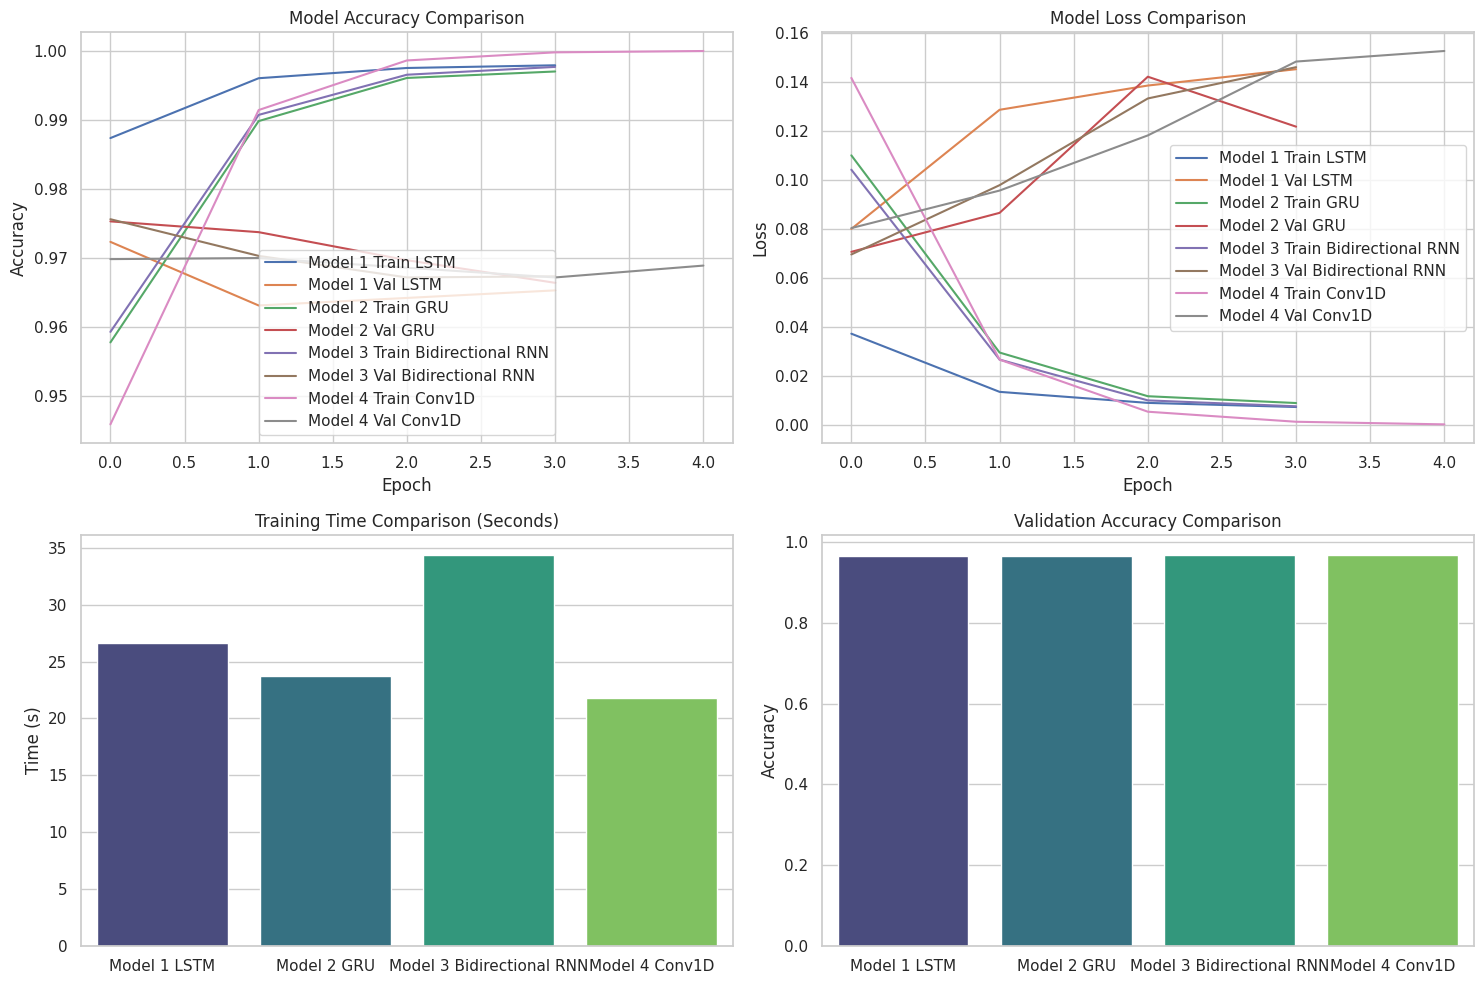

In [ ]:
# Set style
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 10))

# Plot Accuracy
plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'], label='Model 1 Train LSTM')
plt.plot(history.history['val_accuracy'], label='Model 1 Val LSTM')
plt.plot(history_2.history['accuracy'], label='Model 2 Train GRU')
plt.plot(history_2.history['val_accuracy'], label='Model 2 Val GRU')
plt.plot(history_3.history['accuracy'], label='Model 3 Train Bidirectional RNN')
plt.plot(history_3.history['val_accuracy'], label='Model 3 Val Bidirectional RNN')
plt.plot(history_4.history['accuracy'], label='Model 4 Train Conv1D')
plt.plot(history_4.history['val_accuracy'], label='Model 4 Val Conv1D')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot Loss
plt.subplot(2, 2, 2)
plt.plot(history.history['loss'], label='Model 1 Train LSTM')
plt.plot(history.history['val_loss'], label='Model 1 Val LSTM')
plt.plot(history_2.history['loss'], label='Model 2 Train GRU')
plt.plot(history_2.history['val_loss'], label='Model 2 Val GRU')
plt.plot(history_3.history['loss'], label='Model 3 Train Bidirectional RNN')
plt.plot(history_3.history['val_loss'], label='Model 3 Val Bidirectional RNN')
plt.plot(history_4.history['loss'], label='Model 4 Train Conv1D')
plt.plot(history_4.history['val_loss'], label='Model 4 Val Conv1D')
plt.title('Model Loss Comparison')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# Plot Training Time
plt.subplot(2, 2, 3)
times = [model_time, model_2_time, model_3_time, model_4_time]
labels = ['Model 1 LSTM', 'Model 2 GRU', 'Model 3 Bidirectional RNN', 'Model 4 Conv1D']
sns.barplot(x=labels, y=times, palette="viridis")
plt.title('Training Time Comparison (Seconds)')
plt.ylabel('Time (s)')

# Plot Val Accuracy
plt.subplot(2, 2, 4)
acc= [history.history['val_accuracy'][-1], history_2.history['val_accuracy'][-1], history_3.history['val_accuracy'][-1],history_4.history['val_accuracy'][-1]]
labels = ['Model 1 LSTM', 'Model 2 GRU', 'Model 3 Bidirectional RNN', 'Model 4 Conv1D']
sns.barplot(x=labels, y=acc, palette="viridis")
plt.title('Validation Accuracy Comparison')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


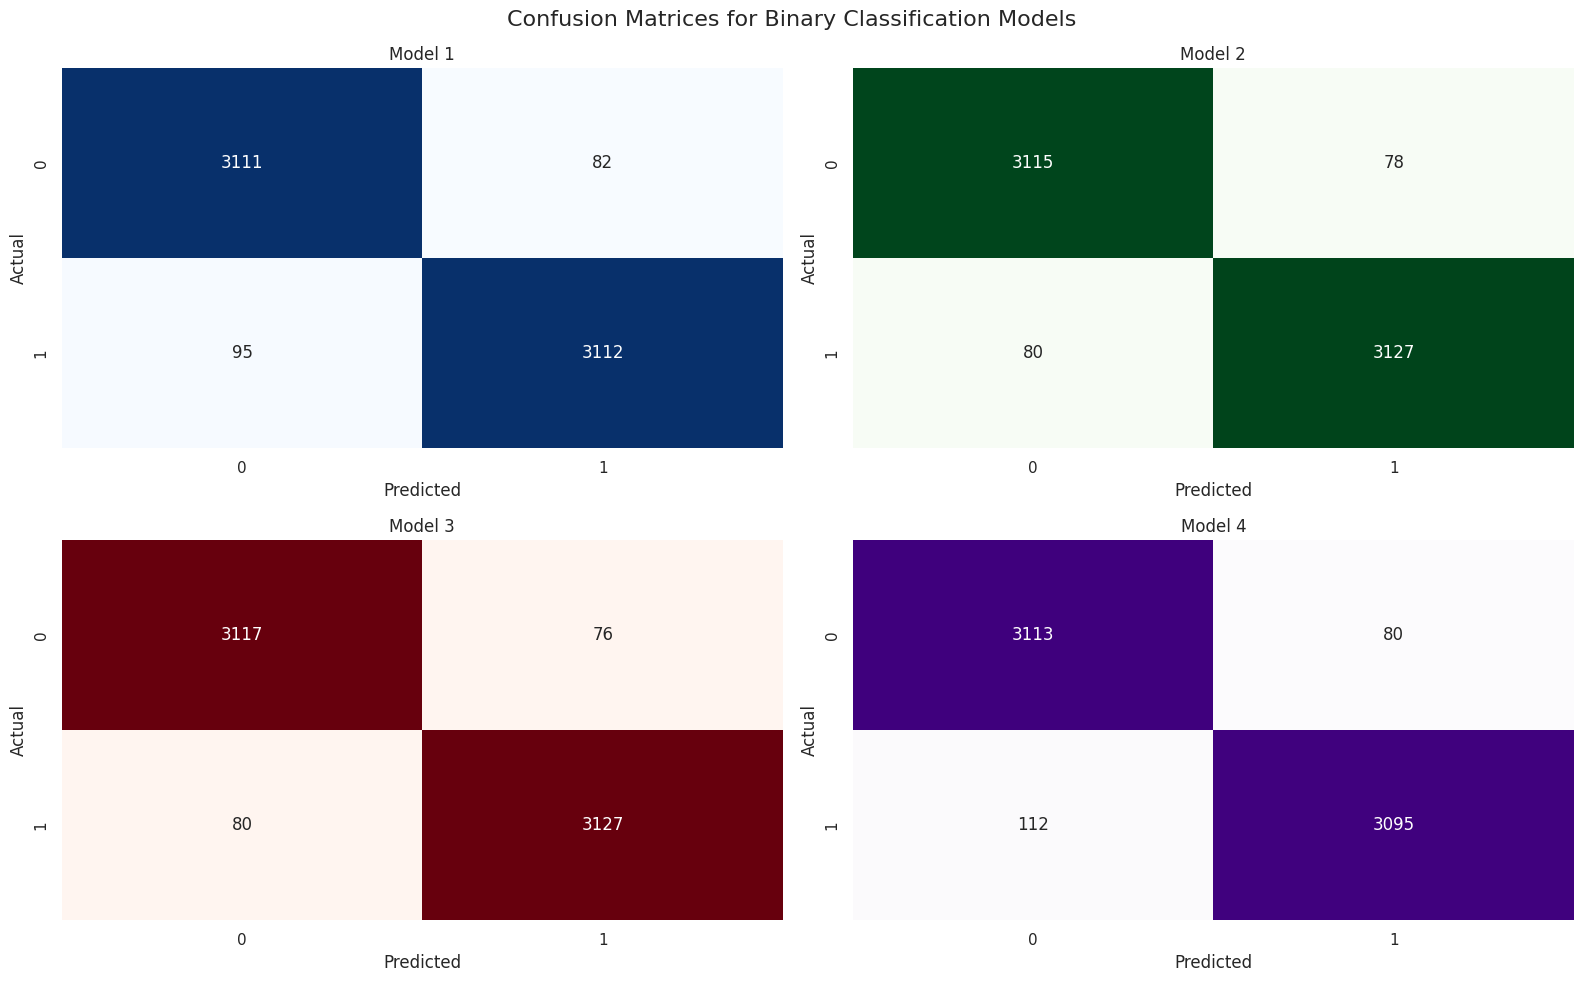

In [ ]:
# Predictions
y_pred_1 = (model.predict(X_test) > 0.5).astype("int32")
y_pred_2 = (model_2.predict(X_test) > 0.5).astype("int32")
y_pred_3 = (model_3.predict(X_test) > 0.5).astype("int32")
y_pred_4 = (model_4.predict(X_test) > 0.5).astype("int32")

y_true = y_test

# Confusion matrices
cm1 = confusion_matrix(y_true, y_pred_1)
cm2 = confusion_matrix(y_true, y_pred_2)
cm3 = confusion_matrix(y_true, y_pred_3)
cm4 = confusion_matrix(y_true, y_pred_4)

# Plot settings
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
plt.suptitle('Confusion Matrices for  Models', fontsize=16)

# Plot each confusion matrix
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0], cbar=False)
axes[0, 0].set_title('Model 1')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')

sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens', ax=axes[0, 1], cbar=False)
axes[0, 1].set_title('Model 2')
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('Actual')

sns.heatmap(cm3, annot=True, fmt='d', cmap='Reds', ax=axes[1, 0], cbar=False)
axes[1, 0].set_title('Model 3')
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('Actual')

sns.heatmap(cm4, annot=True, fmt='d', cmap='Purples', ax=axes[1, 1], cbar=False)
axes[1, 1].set_title('Model 4')
axes[1, 1].set_xlabel('Predicted')
axes[1, 1].set_ylabel('Actual')

plt.tight_layout()
plt.show()